# Домашнее задание №4.

Загрузить датасет https://www.kaggle.com/mlg-ulb/creditcardfraud. 
Сделать статистический анализ таблицы.

In [219]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [220]:
data = pd.read_csv('creditcard.csv')

In [221]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [222]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [224]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [225]:
data.shape

(284807, 31)

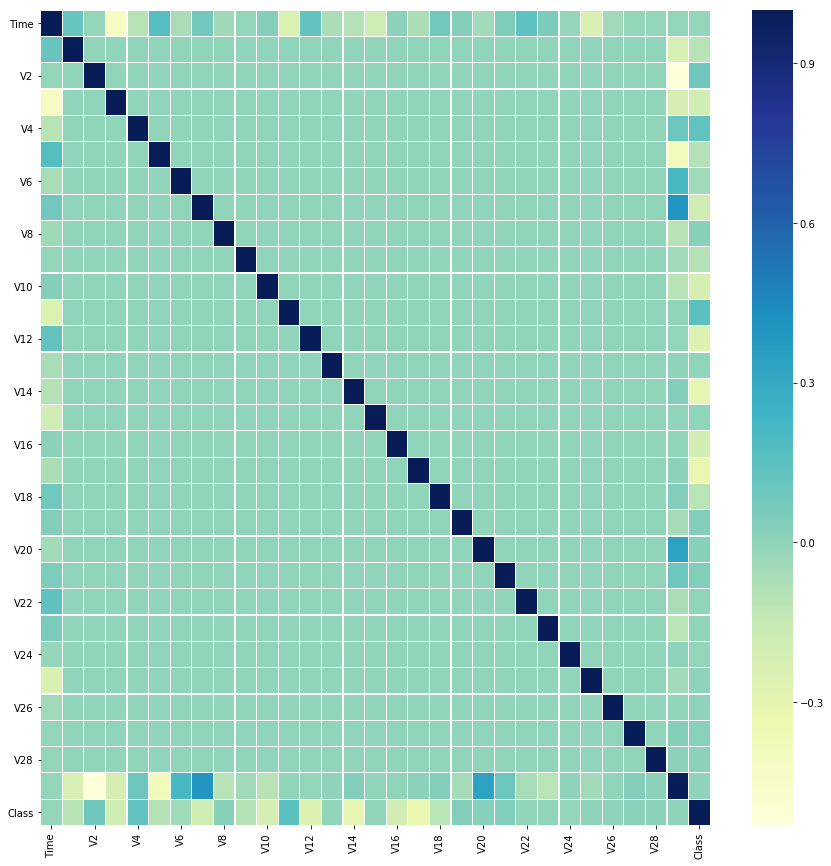

In [226]:
sns.heatmap(data.corr() ,annot = False,cmap="YlGnBu",linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

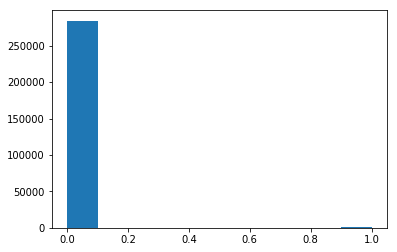

In [227]:
plt.hist(data['Class'])
plt.show()

In [228]:
df = pd.get_dummies(data, columns = ['Class'],
                             prefix=['Class'])

In [229]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class_0,Class_1
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0


In [230]:
df = df.rename({'Class_0': 'normal','Class_1': 'hacked' }, axis=1)

In [231]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normal,hacked
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0


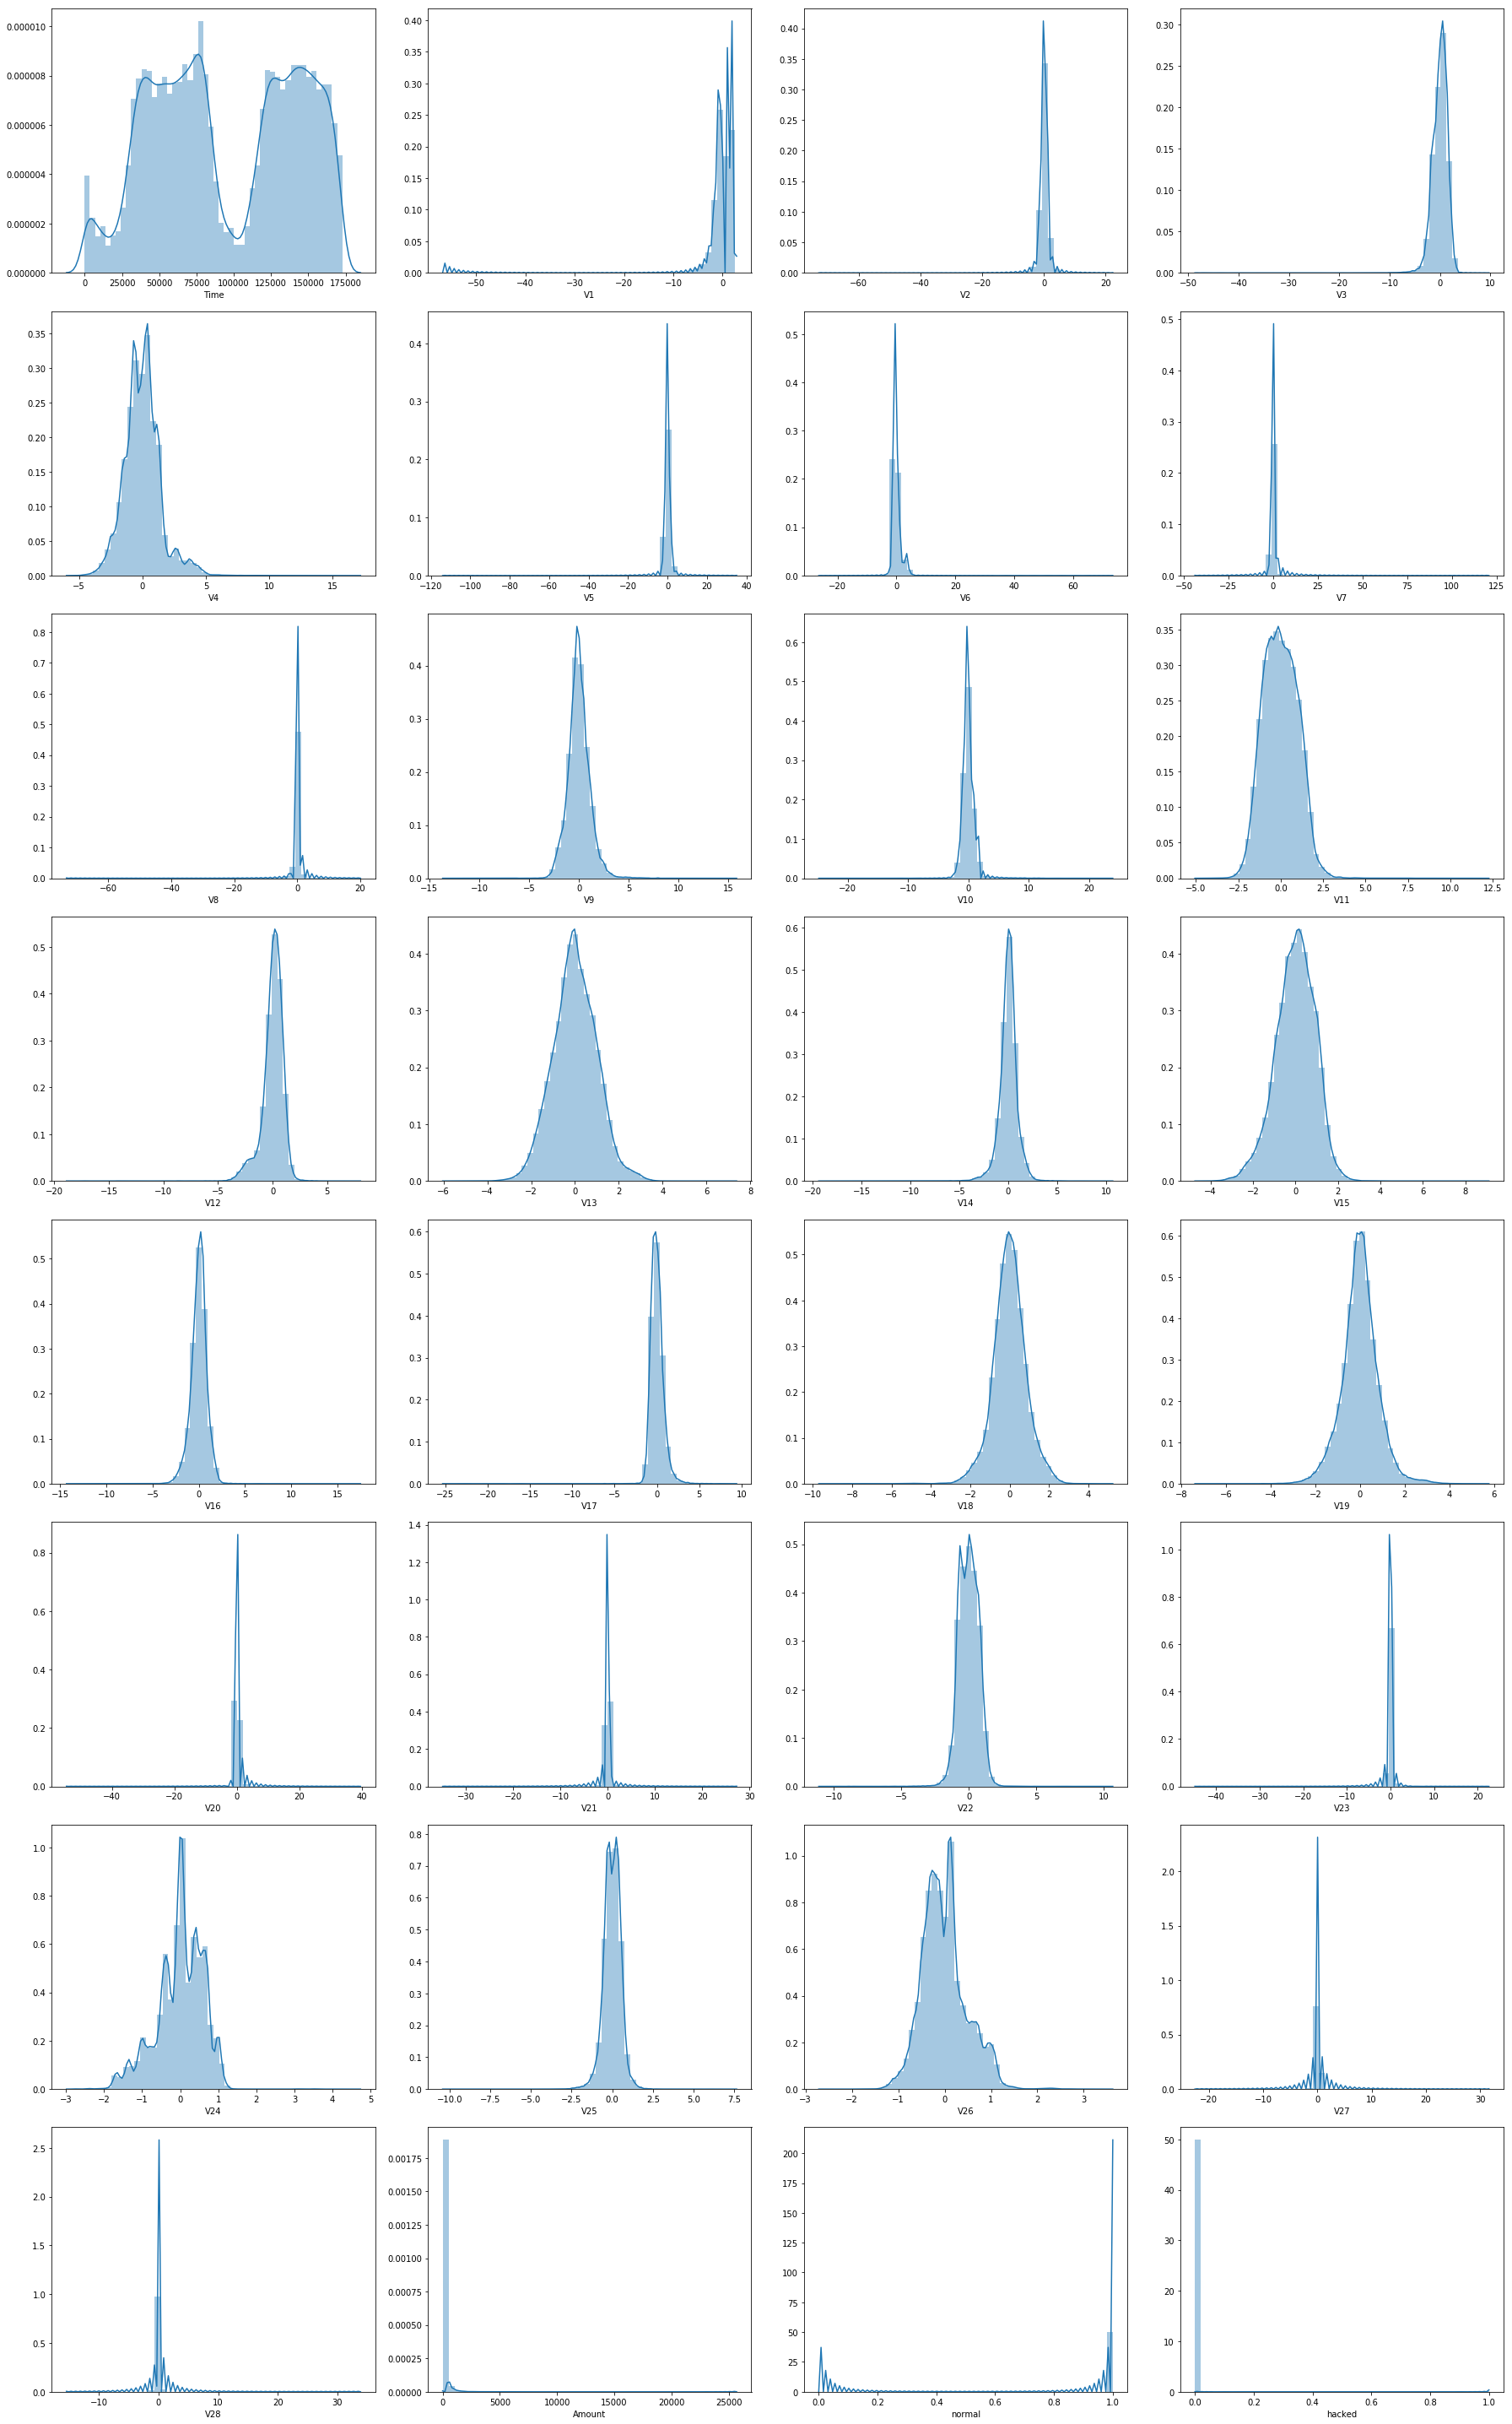

In [232]:
fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(25, 40))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout()
plt.show()

In [233]:
count_hacked = df.hacked.sum()
count_normal = df.normal.sum()
print(count_hacked)
print(count_normal)
print(df.hacked.sum()/df.normal.sum()*100)


492
284315
0.17304750013189596


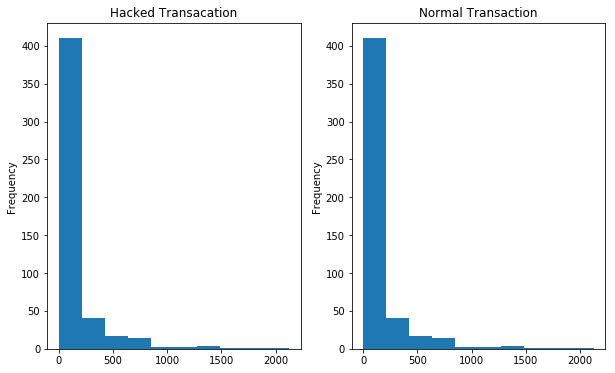

In [234]:
hacked_transacation = df[df['hacked']==1]
Normal_transacation= df[df['normal']==0]
plt.figure(figsize=(10,6))
"""Тут я узнал что номер сабплота должен быть трехзначным"""
plt.subplot(121)
hacked_transacation.Amount.plot.hist(title="Hacked Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

Приведем оба графика к общему виду

In [235]:
df[df['hacked'] == 1].max()['Amount']

2125.87

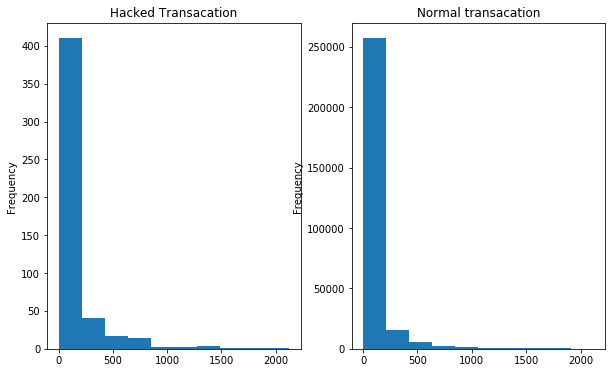

In [236]:
hacked_transacation = df[df['hacked']==1]
normal_transacation= df[df['normal']==1]
plt.figure(figsize=(10,6))
plt.subplot(121)
hacked_transacation[hacked_transacation['Amount'] <= 2125.87].Amount.plot.hist(title="Hacked Transacation")
plt.subplot(122)
normal_transacation[normal_transacation['Amount'] <= 2125.87].Amount.plot.hist(title="Normal transacation")

Исходя из этого графика можно сделать вывод что:<br>
    1.Большинство транзакций приходятся на небольшие суммы ( что очевидно)<br>
    2.Графики крайне похожи, потому невозможно однозначно выделить различия между мошеничискими транзакциями и нормальными.<br>
    3.Отсутсвует закономерность, позволяющая сделать выводы

In [237]:
from sklearn.linear_model import LinearRegression
class_ = data['Class']
amount = data['Amount']
model = LinearRegression()
result = model.fit(np.array(class_).reshape(-1,1), amount)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 88.29102242231325
slope: [33.92029872]


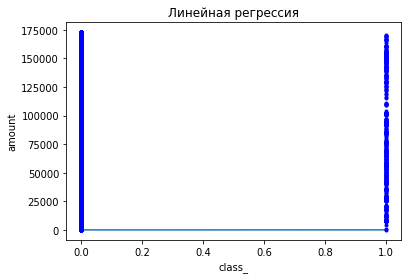

In [238]:
plt.xlabel('class_')
plt.ylabel('amount')
plt.title('Линейная регрессия')
x = np.linspace(min(class_), max(class_), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(class_,time, 'b.')
plt.show()

In [239]:
Hacked = data[data['Class'] == 1 ]['V7']
Normal = data[data['Class'] == 0 ]['V7'][:492]
stats.ttest_rel(Hacked, Normal)

Ttest_relResult(statistic=-17.090207707460504, pvalue=1.0014252297984936e-51)

In [240]:
Hacked = data[data['Class'] == 1 ]['Time']
Normal = data[data['Class'] == 0 ]['Time'][:492]
stats.ttest_rel(Hacked, Normal)

Ttest_relResult(statistic=37.443902211278456, pvalue=5.476713191285245e-146)

Я попровобал разные тесты,разные переменные но результат везде один и  тот же. P-value меньше нуля, различий нет 

Поэтому попробуем сравнить выборку нормальных значений с мошенеческими.

In [241]:
data1 = data[data['Class'] == 1]
len(data1)
data_ = data[data['Class'] == 0]
data2 = data_.sample(n = 492) 
len(data2)
union_data = pd.concat([data1, data2])
len(union_data)


984

Для чистоты эксперимент (я внимаю вашим советам) я использовал sample, чтоб выбрать случайный набор данных

In [242]:
union_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168482,119244.0,1.997443,-0.434708,-0.305054,0.180415,-0.844685,-0.762732,-0.573724,-0.015141,1.488688,...,-0.202336,-0.467867,0.411460,-0.068461,-0.551425,-0.276956,0.006374,-0.039460,3.08,0
152025,96726.0,-0.310122,1.444933,0.445629,-0.584985,1.287589,-1.000843,2.023310,-1.486871,2.568132,...,-0.136955,1.328159,-0.280621,-0.014436,-0.712290,-0.384025,0.098199,-0.554271,3.99,0
178672,123725.0,-0.925206,0.010940,0.567261,-0.718240,1.717017,-1.109648,0.483462,-0.055711,-0.539920,...,0.450682,1.112719,-0.317036,-0.344291,0.268486,-0.126921,0.091104,0.144476,1.00,0
216345,140437.0,2.073880,1.049108,-3.362193,1.698184,1.483400,-2.047679,1.275469,-0.653727,-0.422160,...,0.149682,0.685551,-0.263408,-0.208803,0.872432,-0.190989,-0.014197,-0.015227,1.00,0
114135,73349.0,1.144603,-0.095677,0.743772,0.929933,-0.691673,-0.314387,-0.255239,0.052802,0.687947,...,-0.062123,0.061570,0.001708,0.443426,0.414375,0.421895,-0.001125,0.011934,12.31,0


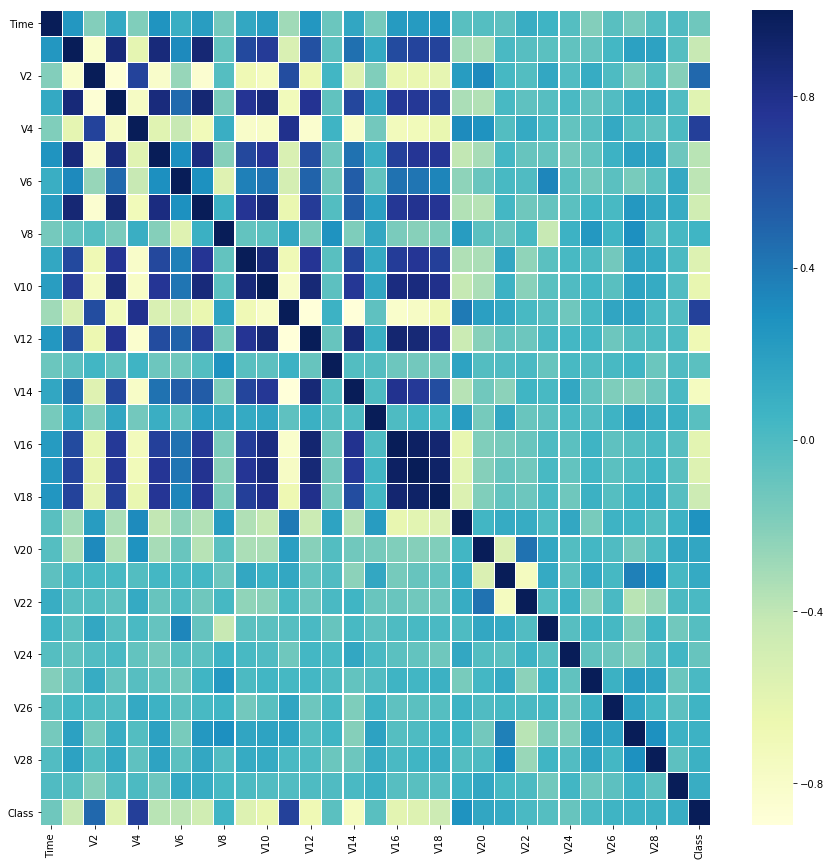

In [243]:
sns.heatmap(union_data.corr() ,annot = False,cmap="YlGnBu",linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

И тут свершилось, "алкоголики называют это момент истины"

Уберем элементы со слабой корреляцией 

In [408]:
corr_matrix = union_data.corr().abs().iloc[:,:30]
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] < 0.1)]
print(to_drop)

['V6', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [409]:
sample_data = union_data.drop(union_data[to_drop], axis=1)
sample_data.head()
len(sample_data)

984

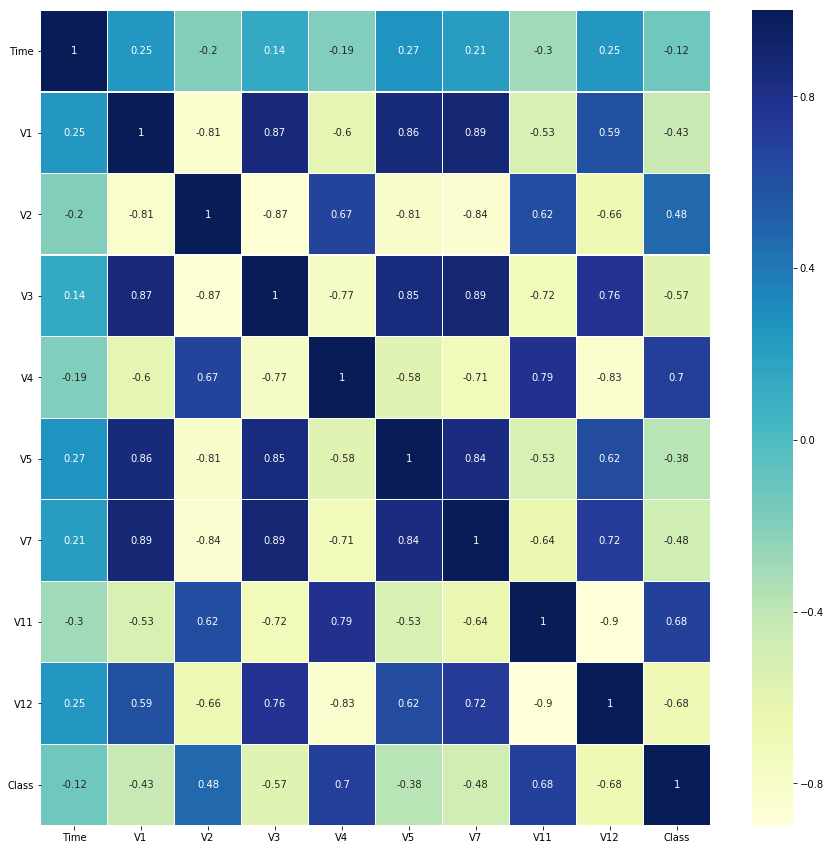

In [410]:
sns.heatmap(sample_data.corr() ,annot = True,cmap="YlGnBu",linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Как видно из графика, класс больше всего коррелирует с V11, V4 и V2

In [411]:
hacked = sample_data[sample_data['Class'] == 1 ]['V4']
normal = sample_data[sample_data['Class'] ==  0 ]['V4']
stats.ttest_rel(hacked, normal)


Ttest_relResult(statistic=30.29317993614625, pvalue=1.8883808266510423e-114)

Показалось. Все еще нет различий

In [412]:
_0 = sample_data[sample_data['Class'] == 1 ]['V4']
_1 = sample_data[sample_data['Class'] == 0 ]['V4']
_2 = sample_data[sample_data['Class'] == 1 ]['V11']
_3 = sample_data[sample_data['Class'] == 0 ]['V11']
_4 = sample_data[sample_data['Class'] == 1 ]['V2']
_5 = sample_data[sample_data['Class'] == 0 ]['V2']

stats.f_oneway(_0, _1, _2,_3, _4, _5)

F_onewayResult(statistic=353.0883838951893, pvalue=4.118395470149486e-297)

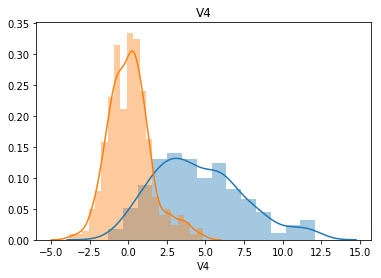

In [413]:
sns.distplot(hacked)
sns.distplot(normal)
plt.title('V4')
plt.show()

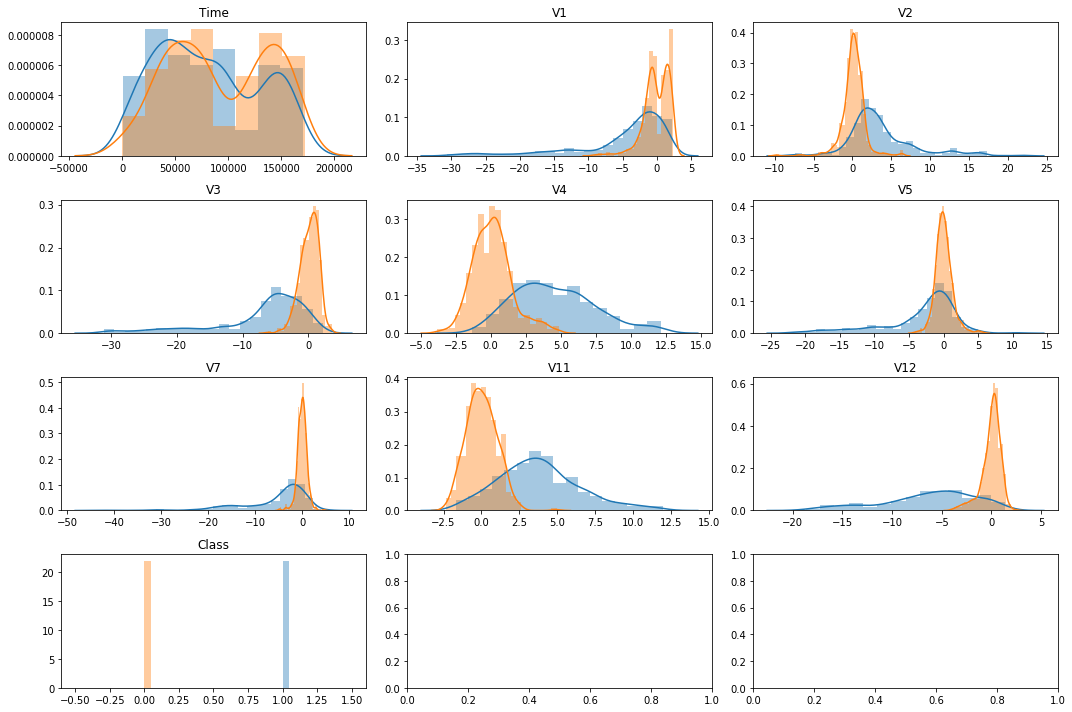

In [414]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))
index = 0
hacked = sample_data[sample_data['Class'] == 1 ]
normal = sample_data[sample_data['Class'] == 0 ]
axs = axs.flatten()
for i in range(len(hacked.columns)):
    sns.distplot(hacked.iloc[:,i:i+1], ax=axs[index])
    axs[i].set_title(hacked.columns[i])
    sns.distplot(normal.iloc[:,i:i+1], ax=axs[index])
    plt.tight_layout()
    index += 1


plt.show()

Анализируя график, видно что графики с мошенеческими схемами имеют более сплюснутый вид

Вероятно лучше бы это все сделать применяя метод SMOTE или ASMO, но я в них, если честно пока не успел полностью разобраться.

In [415]:
sample_data.head(1)

,Time,V1,V2,V3,V4,V5,V7,V11,V12,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-2.537387,3.202033,-2.899907,1


In [439]:
V1 = sample_data['V1']
V2 = sample_data['V2']
V3 = sample_data['V3']
V4 = sample_data['V4']
V5 = sample_data['V5']
chol = sample_data['Class']
x = np.vstack([np.array(V1), np.array(V2),np.array(V3),np.array(V4),np.array(V5)]).T
print(x[:3])
y = np.array(chol)
model = LinearRegression().fit(x, y)

[[-2.31222654  1.95199201 -1.60985073  3.99790559 -0.52218786]
 [-3.04354062 -3.15730712  1.08846278  2.28864362  1.35980513]
 [-2.30334957  1.75924746 -0.35974474  2.33024305 -0.82162833]]


In [437]:
sample_data.iloc[100:984:150]

,Time,V1,V2,V3,V4,V5,V7,V11,V12,Class
30496,35953.0,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-6.311699,3.657350,-7.781448,1
123141,76826.0,-6.616293,3.563428,-7.058901,4.284346,-5.096299,-4.937554,3.259595,-6.943891,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,-1.245106,4.229154,-5.292314,1
153082,97864.0,-0.664597,0.686690,0.616320,-0.824736,0.623210,0.726616,1.241538,-2.203715,0
95626,65398.0,1.188603,0.135141,0.597976,0.565232,-0.587187,-0.071105,1.555138,0.780820,0
114103,73335.0,1.096378,0.179107,0.518549,1.326967,-0.156117,0.011076,1.427431,1.543150,0


In [438]:
"""Как сделать так, что в предикт можно было вбивать конкретные значения, 
например [-2.31222654  1.95199201 -1.60985073  3.99790559 -0.52218786] """
model.predict(x[100:984:150])


array([0.77292237, 0.6771396 , 0.5492319 , 0.15785441, 0.26196993,
       0.34631819])

Модель предсказывает результат не так точно, как хотелось бы, но это уже часть успеха. Сравнивая с таблицей, мы видим, что мошенеческие транзакции ближе к 1 чем нормальные. А значит остается просто обучить модель выявлять их ( как это сделать, я пока не знаю)